In [3]:
using Random
using Distributions
using Plots

Random.seed!(1234);
gr();

In [1]:
include("../distribution/distribution.jl");

## Bernoulli Distributions

$$
\mathrm{Bern}(x \mid \mu) = x^{\mu} \cdot (1 - x)^{1 - \mu}
$$

In [4]:
mu = [0.0, 1.0, 1.0, 1.0];
bernoulli = BernoulliDist(mu);
pdf(bernoulli, 0)

0.25

## Beta Distributions

$$
\mathrm{Beta}(\mu \mid a, b) = \dfrac{\Gamma(a+b)}{\Gamma(a) \Gamma(b)} \mu^{a-1}(1-\mu)^{b-1}
$$

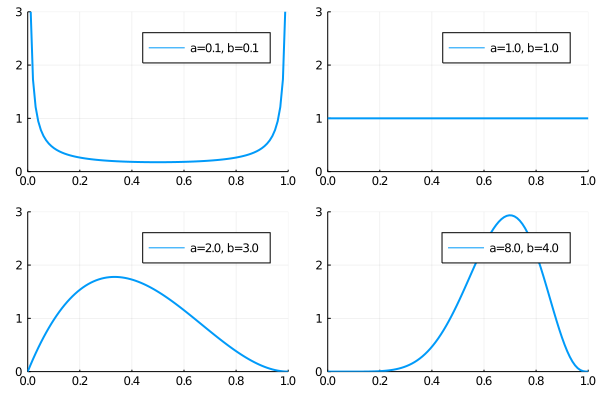

In [4]:
plots = [];
l = @layout [a b; c d]

x = collect(reshape(range(0, stop=1.0, length=100), 100));
for (index, values) in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]])
    a, b = values[1], values[2];
    beta = BetaDist(a, b);
    y = pdf(beta, x);
    p = plot(x, y, xlims=(0, 1), ylims=(0, 3), label="a=$a, b=$b", lw=2);
    push!(plots, p);
end

plot(plots[1], plots[2], plots[3], plots[4], layout=l)

### ML and MAP estimation

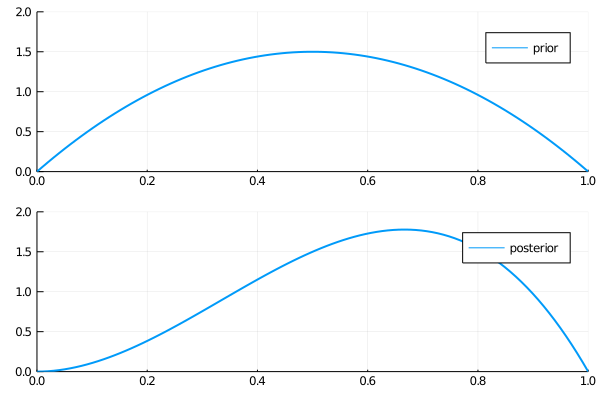

In [12]:
plots = [];
l = @layout [a; b]

x = collect(reshape(range(0, stop=1.0, length=100), 100));

beta = BetaDist(2, 2);
p = plot(x, pdf(beta, x), xlim=(0, 1), ylim=(0, 2), label="prior", lw=2);
push!(plots, p);

bern = BernoulliDist(beta);
fitting(bern, [1.0])
p = plot(x, pdf(bern._beta, x), xlim=(0, 1), ylim=(0, 2), label="posterior", lw=2);
push!(plots, p);

plot(plots[1], plots[2], layout=l)

In [5]:
println("Maximum likehood estimation");

model = BernoulliDist([1.0]);
count = draw(model, 10000);
println("$(count) out of 10000 is label-1");

println("Beysian estimation");
model = BernoulliDist(BetaDist(1.0, 1.0));
fitting(model, [1.0]);
count = draw(model, 10000);
println("$(count) out of 10000 is label-1");

Maximum likehood estimation
10000 out of 10000 is label-1
Beysian estimation
6663 out of 10000 is label-1


## Categorical variables

In [7]:
model = CategoricalDist([0.0]);
fitting(model, [[0. 1. 0.]; [1. 0. 0.]; [0. 1. 0.]]);
println(model._mu);

mu = DirichletDist(ones(3));
model = CategoricalDist(mu);
println("prior");
println(model._dirichlet._alpha);
trials = [[1. 0. 0.]; [1. 0. 0.]; [0. 1. 0.]];
fitting(model, trials);
println("posterior");
println(model._dirichlet._alpha);

[0.3333333333333333, 0.6666666666666666, 0.0]
prior
[1.0, 1.0, 1.0]
posterior
[3.0, 2.0, 1.0]


## Gaussian Distribution